<a href="https://colab.research.google.com/github/sibot89/PyTorch/blob/main/%D9%90Diabetes_Diagnosis_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project we want to predict having diabetes

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
from torch.optim import SGD

In [22]:
from google.colab import files
files.upload()

Saving diabetes_dataset.csv to diabetes_dataset (1).csv


{'diabetes_dataset (1).csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\n2,138,62,35,0,33.6,0.127,47,1\n0,84,82,31,125,38.2,0.233,23,0\n0,145,0,0,0,44.2,0.63,31,1\n0,135,68,42,250,42.3,0.365,24,1\n1,139,62,41,480,40.7,0.536,21,0\n0,173,78,32,265,46.5,1.159,58,0\n4,99,72,17,0,25.6,0.294,28,0\n8,194,80,0,0,26.1,0.551,67,0\n2,83,65,28,66,36.8,0.629,24,0\n2,89,90,30,0,33.5,0.292,42,0\n4,99,68,38,0,32.8,0.145,33,0\n4,125,70,18,122,28.9,1.144,45,1\n3,80,0,0,0,0,0.174,22,0\n6,166,74,0,0,26.6,0.304,66,0\n5,110,68,0,0,26,0.292,30,0\n2,81,72,15,76,30.1,0.547,25,0\n7,195,70,33,145,25.1,0.163,55,1\n6,154,74,32,193,29.3,0.839,39,0\n2,117,90,19,71,25.2,0.313,21,0\n3,84,72,32,0,37.2,0.267,28,0\n6,0,68,41,0,39,0.727,41,1\n7,94,64,25,79,33.3,0.738,41,0\n3,96,78,39,0,37.3,0.238,40,0\n10,75,82,0,0,33.3,0.263,38,0\n0,180,90,26,90,36.5,0.314,35,1\n1,130,60,23,170,28.6,0.692,21,0\n2,84,50,23,76,30.4,0.968,21,0\n8,120,78,0,0,25,0.409,64,0\n12,84,72,31,0

In [116]:
df = pd.read_csv('diabetes_dataset.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [117]:
num_samples, num_features = df.shape
num_features -= 1
num_samples, num_features

(2000, 8)

In [118]:
X = df.drop(['Outcome'], axis=1).values
X.shape

(2000, 8)

In [119]:
y = df['Outcome'].values.reshape(-1, 1)
y.shape

(2000, 1)

Split the dataset into train and test

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,
                                                    random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 8), (1600, 1), (400, 8), (400, 1))

Split the train set into train and validation sets

In [163]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.9)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1440, 8), (1440, 1), (160, 8), (160, 1))

Scaling

In [164]:
x_scaler = StandardScaler()
X_train  = x_scaler.fit_transform(X_train)
X_valid  = x_scaler.transform(X_valid)
X_test  = x_scaler.transform(X_test)
X_train.min(), X_train.max()

(np.float64(-4.054429488134863), np.float64(6.069388955016736))

Convert into tensors

In [165]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)

X_valid = torch.tensor(X_valid, dtype=torch.float32)
y_valid = torch.tensor(y_valid, dtype=torch.float32)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

(torch.Size([1440, 8]),
 torch.Size([1440, 1]),
 torch.Size([160, 8]),
 torch.Size([160, 1]),
 torch.Size([400, 8]),
 torch.Size([400, 1]))

In [166]:
train_set = TensorDataset(X_train, y_train)
valid_set = TensorDataset(X_valid, y_valid)
test_set = TensorDataset(X_test, y_test)

In [167]:
train_loader = DataLoader(train_set, batch_size=80, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=160)
test_loader = DataLoader(test_set, batch_size=400)

Build the model

In [168]:
model = nn.Sequential(
    nn.Linear(num_features, 1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=8, out_features=1, bias=True)
  (1): Sigmoid()
)

In [169]:
loss_fn = nn.BCELoss()

In [170]:
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.5)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0.5
    nesterov: False
    weight_decay: 0
)

Train and validate

In [171]:
n_epochs = 200
loss_train_hist, acc_train_hist = [], []
loss_valid_hist, acc_valid_hist = [], []

In [172]:

for i in range(n_epochs):
  mean_loss_train, mean_loss_valid = 0, 0
  mean_acc_train, mean_acc_valid = 0, 0
  for x_batch , y_batch in train_loader:
    y_hat = model(x_batch)

    loss = loss_fn(y_hat, y_batch)
    loss.backward()

    optimizer.step()
    optimizer.zero_grad()

    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train += torch.sum(y_hat.round() == y_batch).item()

  mean_loss_train = mean_loss_train/len(train_set)
  mean_acc_train = mean_acc_train/len(train_set)

  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)

  with torch.no_grad():
    for x_batch , y_batch in valid_loader:
      y_hat = model(x_batch)
      loss = loss_fn(y_hat, y_batch)
      mean_loss_valid += loss.item() * len(x_batch)
      mean_acc_valid += torch.sum(y_hat.round() == y_batch).item()

    mean_loss_valid = mean_loss_valid/len(valid_set)
    mean_acc_valid = mean_acc_valid/len(valid_set)

    loss_valid_hist.append(mean_loss_valid)
    acc_valid_hist.append(mean_acc_valid)


  # print(f"epoch: {i}  "
  #     f"TrainLoss: {mean_loss_train:.2}  "
  #     f"TrainAcc: {mean_acc_train:.2}  "
  #     f"ValidLoss: {mean_loss_valid:.2}  "
  #     f"ValidAcc: {mean_acc_valid:.2}")

In [173]:
loss_train_hist

[0.7494438456164466,
 0.6945870783593919,
 0.6533325215180715,
 0.6225330763392978,
 0.5993066562546624,
 0.5812818706035614,
 0.567075123389562,
 0.5558262103133731,
 0.5465781374110116,
 0.5389757951100668,
 0.5326097988420062,
 0.5272886984878116,
 0.5225042617983289,
 0.5185830510324902,
 0.5151057541370392,
 0.512085830171903,
 0.509397856063313,
 0.5070227566692564,
 0.5048575301965078,
 0.5029684868123796,
 0.5012937188148499,
 0.4997575730085373,
 0.4983683162265354,
 0.497157033946779,
 0.49597952928808,
 0.49498318632443744,
 0.49406197998258805,
 0.4931937555472056,
 0.49243153797255623,
 0.4917210125260883,
 0.49106544421778786,
 0.4904698265923394,
 0.4899258878495958,
 0.4894488785001967,
 0.48896437055534786,
 0.48849281503094566,
 0.4881255891587999,
 0.48775246408250594,
 0.487369062172042,
 0.4870283603668213,
 0.4867643515268962,
 0.4865006042851342,
 0.486280373401112,
 0.48602170248826343,
 0.4858180168602202,
 0.48557517925898236,
 0.4853659040398068,
 0.485343269

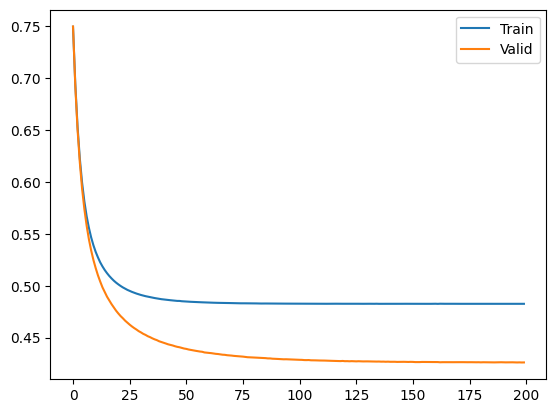

In [174]:
plt.plot(loss_train_hist)
plt.plot(loss_valid_hist)
plt.legend(['Train', 'Valid'])

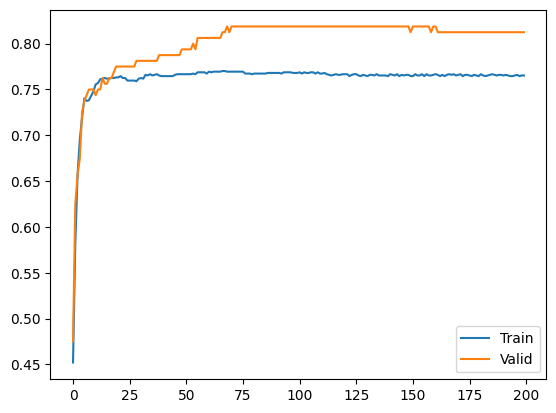

In [175]:
plt.plot(torch.arange(n_epochs), acc_train_hist)
plt.plot(torch.arange(n_epochs), acc_valid_hist)
plt.legend(['Train', 'Valid'])

Test

In [176]:
mean_acc_test = 0
with torch.no_grad():
  for x_batch, y_batch in test_loader:
    y_hat = model(x_batch)
    mean_acc_test += torch.sum(y_hat.round() == y_batch).item()

  mean_acc_test = mean_acc_test/len(test_set)
mean_acc_test

0.7875